# Question 1 

##### Identify the morphological operators/filters used for the given input and output images and implement the effects using morphological operators/filters on the morphology.png image.

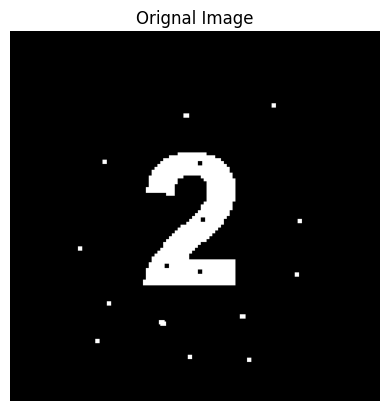

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 as cv

img = mpimg.imread('morphology.png')
plt.imshow(img)
plt.title("Orignal Image")
plt.axis('off')
plt.show()

# Two iterations of erosion 

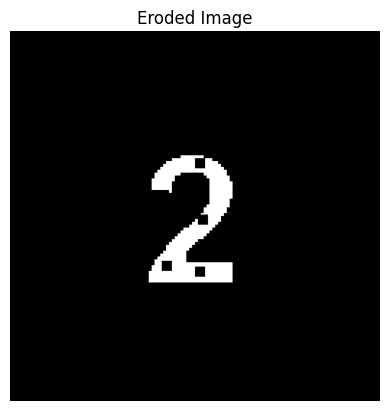

In [92]:
kernel = np.ones((3,3), np.uint8)

# two iterations of open cv erosion
erosion = cv.morphologyEx(img, cv.MORPH_ERODE, kernel, iterations=2)

plt.imshow(erosion, cmap='gray')
plt.title("Eroded Image")
plt.axis('off')
plt.show()

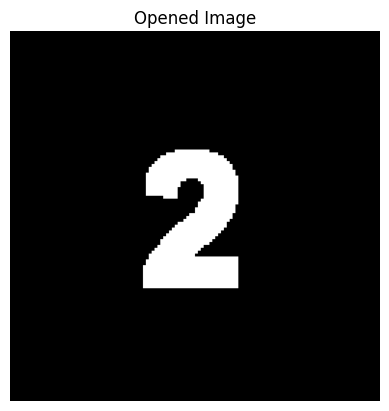

In [93]:
kernel = np.ones((3,3), np.uint8)

erosion = cv.morphologyEx(img, cv.MORPH_ERODE, kernel, iterations=2)
dialate = cv.morphologyEx(erosion, cv.MORPH_DILATE, kernel, iterations=4)

plt.imshow(dialate, cmap='gray')
plt.title("Opened Image")
plt.axis('off')
plt.show()

# Question 2

##### Apply both morphological and median filters on the fingerprint image (fingerprint_BW.png). Compare the result and comment under what condition, one filter might perform better than the othe

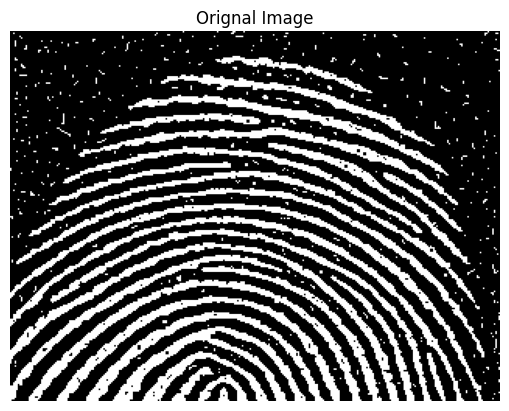

In [94]:
fingerprints = mpimg.imread('fingerprint_BW.png')

plt.imshow(fingerprints)
plt.title("Orignal Image")
plt.axis('off')
plt.show()

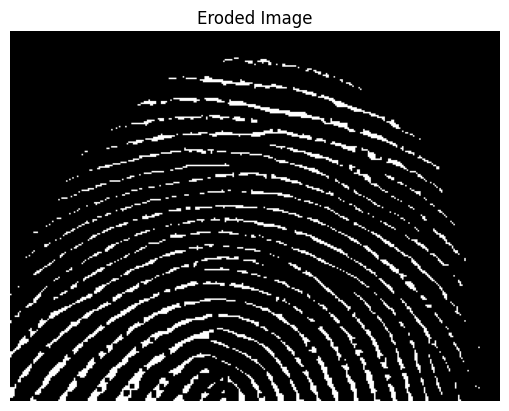

In [95]:
erosion = cv.morphologyEx(fingerprints, cv.MORPH_ERODE, kernel, iterations=1)

plt.imshow(erosion, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')
plt.show()

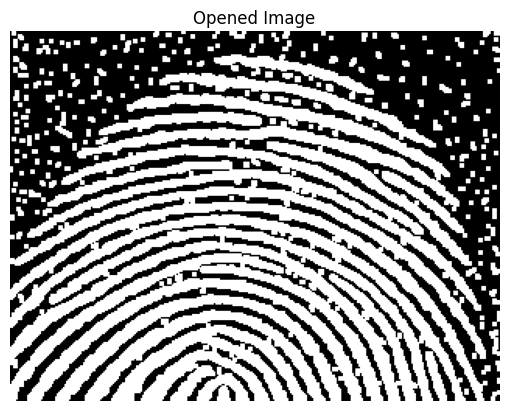

In [96]:
dialate = cv.morphologyEx(fingerprints, cv.MORPH_DILATE, kernel, iterations=1)

plt.imshow(dialate, cmap='gray')
plt.title('Opened Image')
plt.axis('off')
plt.show()

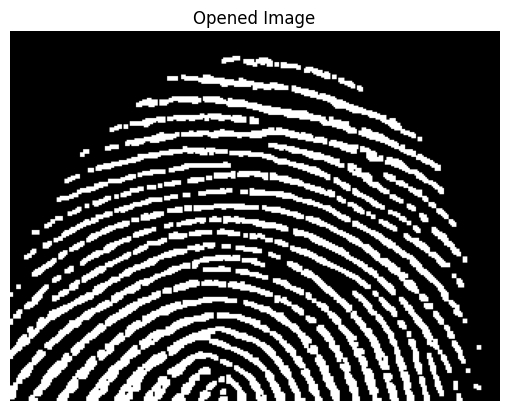

In [97]:
opening = cv.morphologyEx(fingerprints, cv.MORPH_OPEN, kernel, iterations=1)

plt.imshow(opening, cmap='gray')
plt.title('Opened Image')
plt.axis('off')
plt.show()

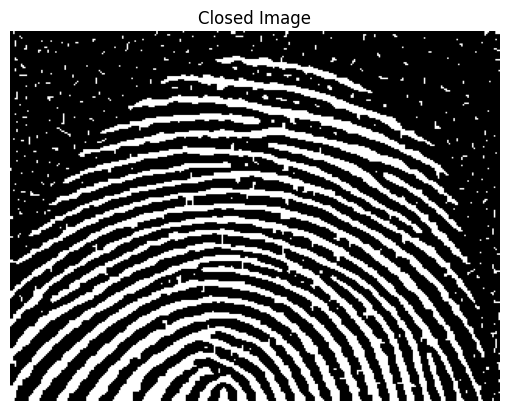

In [98]:
closing = cv.morphologyEx(fingerprints, cv.MORPH_CLOSE, kernel, iterations=1)

plt.imshow(closing, cmap='gray')
plt.title('Closed Image')
plt.axis('off')
plt.show()